# Деревья решений

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !py -m pip install scipy
# !py -m pip install pydot

# 0. Повторение
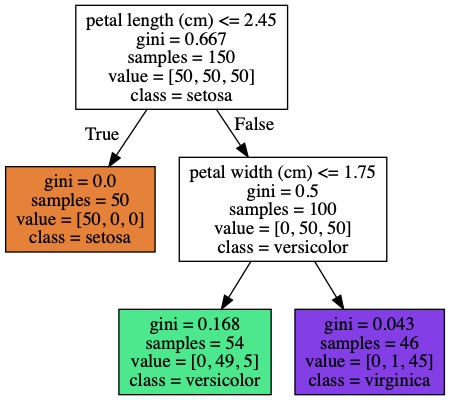
Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия характеристик этому правилу.
По результату проверки множество экземляров разбивается на два подмножества (соответствующие правилу, не соответствующие правилу).
Процедура повторяется множество раз.
Последний элемент - лист.

Лист:
 - для классификатора: целевой класс;
 - для регрессора: среднее значение в интервале.
 
Регуляризация дерева:
 - ограничение по максимальной глубине дерева;
 - ограничение на минимальное количество объектов в листе;
 - ограничение на максимальное количество листьев в дереве;
 - требование,улучшения функции качества не менее, чем на n%.


# 1. Деревья решений в sklearn

## 1.1 Demo: Загрузка данных

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score

%matplotlib inline

Набор данных - Ирисы Фишера (Андерсона)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, 2:] # petal length and width
target_names = iris.target_names
feature_names = iris.feature_names[2:]

y = iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 1.2 Demo: Деревья. Классификация

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
from sklearn.tree import DecisionTreeClassifier

# criterion: “gini”, “entropy”, “log_loss”. default=”gini”
tree_clf_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=2, random_state=42)
tree_clf_gini.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

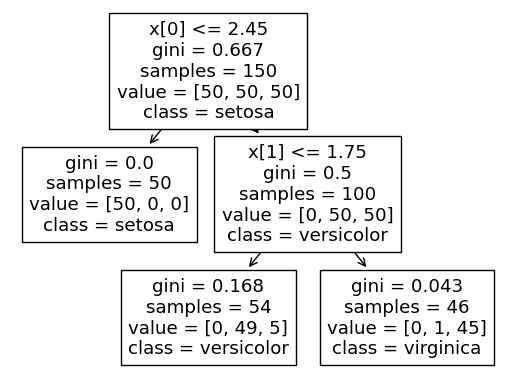

In [7]:
from sklearn import tree
tree.plot_tree(tree_clf_gini, class_names = iris.target_names)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'x[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

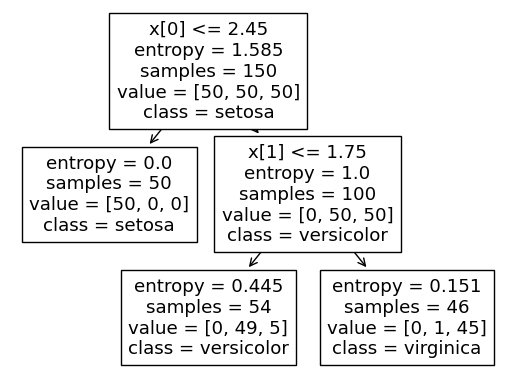

In [8]:
# Task
# criterion: “gini”, “entropy”. default=”gini”
# Задание: постройте и визуализируйте структуру решающего дерева
# для критерия разбиения “entropy"
from sklearn import tree
tree_clf_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, random_state=42)
tree_clf_entropy.fit(X, y)
tree.plot_tree(tree_clf_entropy, class_names = iris.target_names)

## 1.3 Demo: Визуализация обученного дерева

![](https://drive.google.com/uc?export=view&id=1vbHl0PRg3kVOtJGuQmh5uuHCnW6t-uRR)

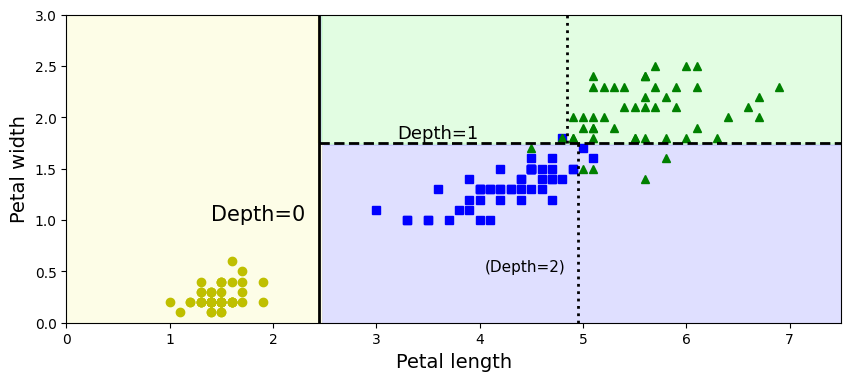

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(10, 4))
plot_decision_boundary(tree_clf_gini, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## 1.3 Demo: Переобучение
Так как при построении дерева используется принцип жадной максимизации, то дерево достаточно легко переобучить
(предположение о том, что при один раз выбранном решении о разбиении на подмножества, оно гарантированно приведет к наилучшему результату)

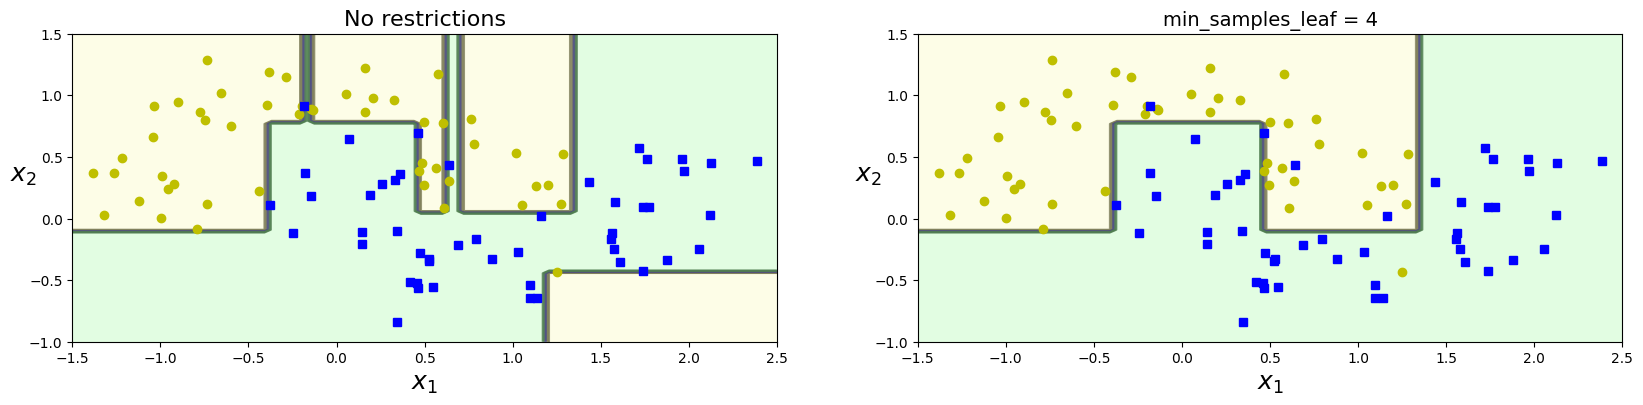

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## 1.4 Demo: Чувствительность дерева к представлению данных

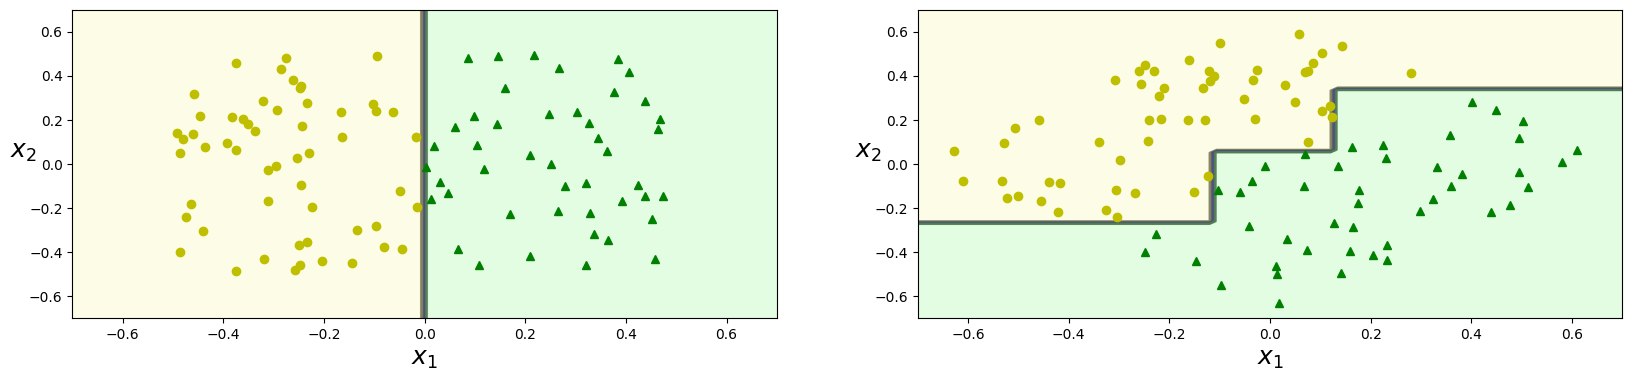

In [11]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

## 1.5 Demo: Деревья. Регрессия

In [12]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

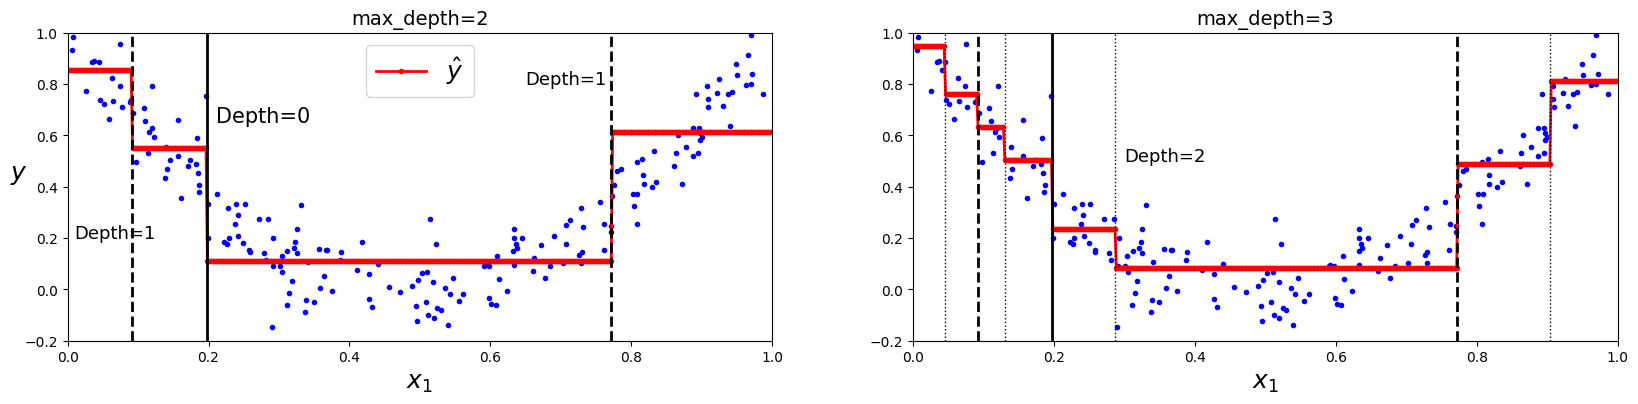

In [14]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

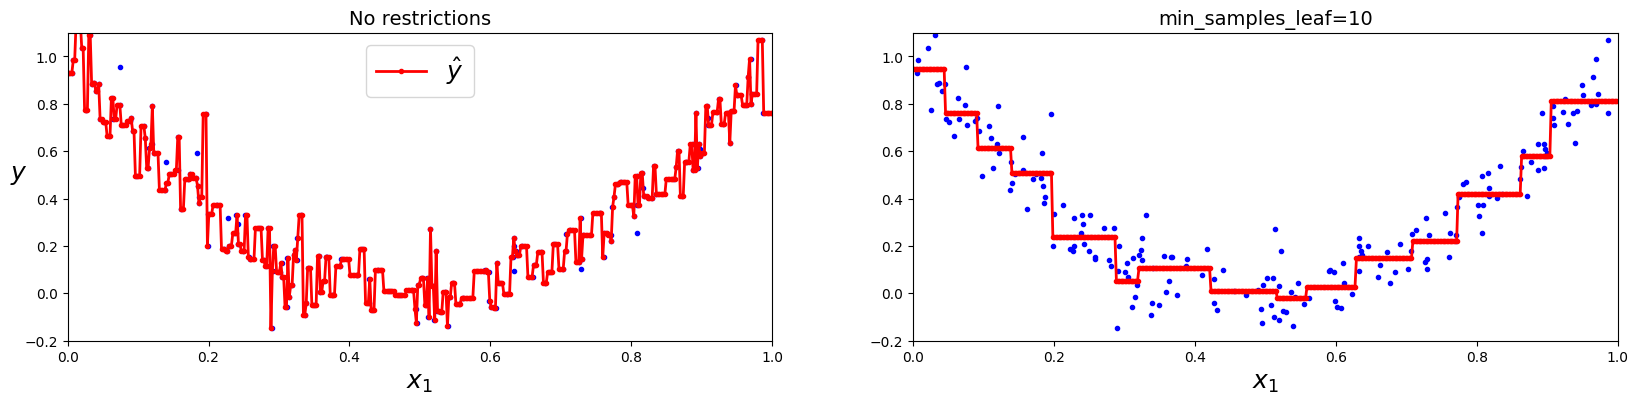

In [15]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(20, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

## 1.6 Прикладная задача: предсказание времени задержки

In [16]:
train = pd.read_csv('./departure-delayed/train_features.csv').fillna(0)
test = pd.read_csv('./departure-delayed/test_features.csv').fillna(0)

In [106]:
y = pd.read_csv('./departure-delayed/train_target.csv', index_col='id')

In [107]:
y[:5]

,DelayTime
id,
0,15.0
1,40.0
2,31.0
3,71.0
4,15.0


Размеры выборок

In [19]:
train.shape, y.shape

((1355730, 13), (1355730, 1))

Посмотрим как выглядят данные

In [20]:
train.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance
0,2008,4,23,3,700,907,US,1195,N119US,307.0,PHL,PHX,2075
1,2008,7,18,5,2154,2349,US,401,N637AW,115.0,PHX,SFO,651
2,2008,12,21,7,1921,1949,NW,1767,N782NC,88.0,DTW,MSN,312
3,2008,4,24,4,1955,2020,WN,1865,N272WN,145.0,SAT,PHX,843
4,2008,6,27,5,1700,1848,OH,5186,N804CA,108.0,ORF,CVG,485


Для начала, мы рассмотрим переменные, заданные числами

In [21]:
train.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance
count,1355730.0,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06
mean,2008.0,6.110740e+00,1.574999e+01,3.983747e+00,1.467329e+03,1.634319e+03,2.184460e+03,1.342627e+02,7.655388e+02
std,0.0,3.483056e+00,8.777616e+00,1.996024e+00,4.248367e+02,4.644701e+02,1.944718e+03,7.133404e+01,5.745182e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.200000e+01,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,6.100000e+02,8.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.543000e+03,1.160000e+02,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.015000e+03,3.422000e+03,1.650000e+02,9.980000e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,9.741000e+03,6.600000e+02,4.962000e+03


In [22]:
# Проверим, прежде чем выкидывать признак:
print("Значений признака 'year' в трейне " ,  train['Year'].nunique())
print("Значений признака 'year' в тесте " ,  test['Year'].nunique())

Значений признака 'year' в трейне  1
Значений признака 'year' в тесте  1


Итак, какие выводы мы можем сделать? 
1. Признак `year` не несет вариативности в данные - удалим его
2. Признаки `Month`, `DayofMonth`, `DayOfWeek` скорее всего можно рассматривать как категориальные

In [23]:
train.drop('Year', axis=1, inplace=True)
test.drop('Year', axis=1, inplace=True)

In [24]:
types = train.dtypes
real_cols = list(types[types != 'object'].index.values)
cat_cols = list(types[types == 'object'].index.values)
types

Month               int64
DayofMonth          int64
DayOfWeek           int64
CRSDepTime          int64
CRSArrTime          int64
UniqueCarrier      object
FlightNum           int64
TailNum            object
CRSElapsedTime    float64
Origin             object
Dest               object
Distance            int64
dtype: object

##### Разделение тренировочной выборки на тренировочную и валидационную

In [25]:
x_train, x_val, y_train, y_val = train_test_split(train, y, train_size=0.8, test_size=0.2, random_state=42)

In [26]:
from sklearn.metrics import mean_absolute_error
dt = DecisionTreeRegressor()
dt.fit(x_train[real_cols], y_train)
mse_train = mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
mse_val = mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
print(mse_train, mse_val)

0.0 43.4894521770559


Регуляризация дерева: по глубине и количеству экземпляру в листьях

In [27]:
mse_train = []
mse_val = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1, min_samples_leaf=1000)
    dt.fit(x_train[real_cols], y_train)
    mse_train = np.append(mse_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mse_val = np.append(mse_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

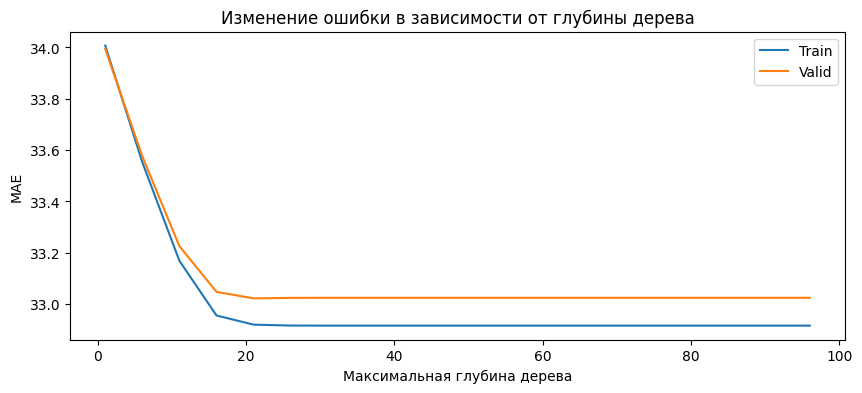

In [28]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot([i*5 + 1 for i in range(20)], mse_train, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mse_val, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.show()

In [30]:
# обучите серию классификаторов без регуляризации по минимальному количеству экземпляров в листе.
# визуализируйте MAE
mse_train_no_leaf = []
mse_val_no_leaf = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1)
    dt.fit(x_train[real_cols], y_train)
    mse_train_no_leaf = np.append(mse_train_no_leaf, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mse_val_no_leaf = np.append(mse_val_no_leaf, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

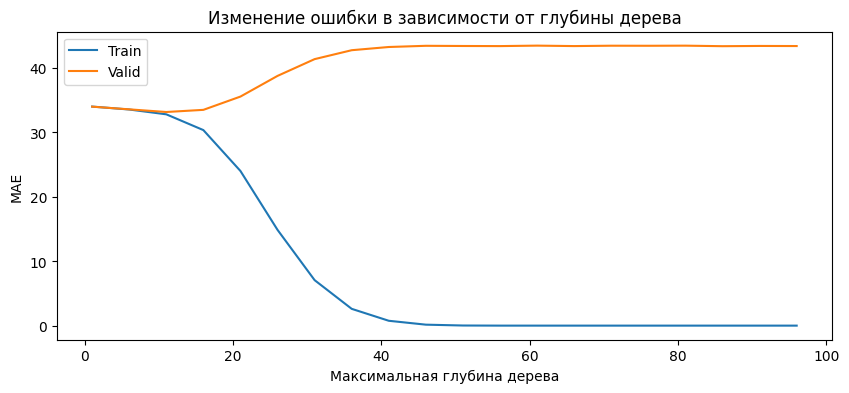

In [31]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot([i*5 + 1 for i in range(20)], mse_train_no_leaf, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mse_val_no_leaf, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.show()

а если 200 элементов как мин число элементов в листе?

In [40]:
mse_train = []
mse_val = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1, min_samples_leaf=200)
    dt.fit(x_train[real_cols], y_train)
    mse_train = np.append(mse_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mse_val = np.append(mse_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

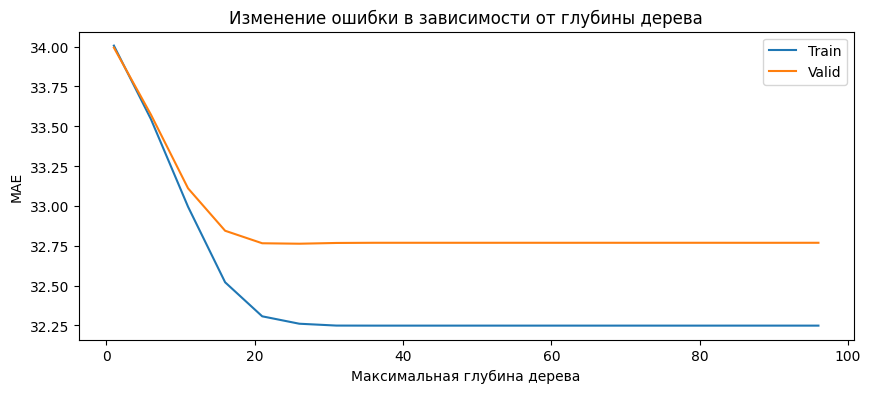

In [41]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot([i*5 + 1 for i in range(20)], mse_train, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mse_val, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.show()

In [42]:
# обучите дерево с наилучшими параметрами из предыдущего примера
best_dt = DecisionTreeRegressor(max_depth=21, min_samples_leaf=200)
best_dt.fit(x_train[real_cols], y_train)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=200)

# 2. Ансамбли
## 2.1 Out of Bag Error

In [43]:
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification 
  
# Generate random data 
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_informative=5, 
                           n_classes=2, 
                           random_state=0) 

clf = RandomForestClassifier(n_estimators=100, 
                             oob_score=True, 
                             random_state=0) 
clf.fit(X, y) 
  
oob_error = 1 - clf.oob_score_ 
  
print(f'OOB error: {oob_error:.3f}') 

OOB error: 0.044


## 2.2 Bagging

In [44]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [45]:
bag_of_trees = BaggingRegressor(best_dt, n_estimators=5, random_state=42)

In [46]:
bag_of_trees.fit(x_train[real_cols], y_train)

/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=21,
                                                 min_samples_leaf=200),
                 n_estimators=5, random_state=42)

In [47]:
bag_mse_val = mean_absolute_error(bag_of_trees.predict(x_val[real_cols]), y_val)
bag_mse_val

32.630481661275155

In [48]:
bag_mse_train = mean_absolute_error(bag_of_trees.predict(x_train[real_cols]), y_train)
bag_mse_train

32.29409357248109

In [49]:
# Задача: выбрать оптимальное количество регрессоров, оптимальные параметры для Bagging Regressor

In [64]:
estimators_cv = [30 * (i + 1) for i in range(10)]
max_depth_cv = [5 * (i+1) for i in range(7)]

estim_scoring = []

for n_estim in estimators_cv:
    print(f"n_estim: {n_estim}")
    tree = DecisionTreeRegressor(max_depth=10)
    bag_of_trees = BaggingRegressor(tree, n_estimators=n_estim, random_state=42)
    bag_of_trees.fit(x_train[real_cols], y_train)
    bag_mse_val = mean_absolute_error(bag_of_trees.predict(x_val[real_cols]), y_val)
    bag_mse_train = mean_absolute_error(bag_of_trees.predict(x_train[real_cols]), y_train)
    estim_scoring.append([bag_mse_train, bag_mse_val])

n_estim: 30


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 60


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 90


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 120


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 150


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 180


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 210


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 240


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 270


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 300


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


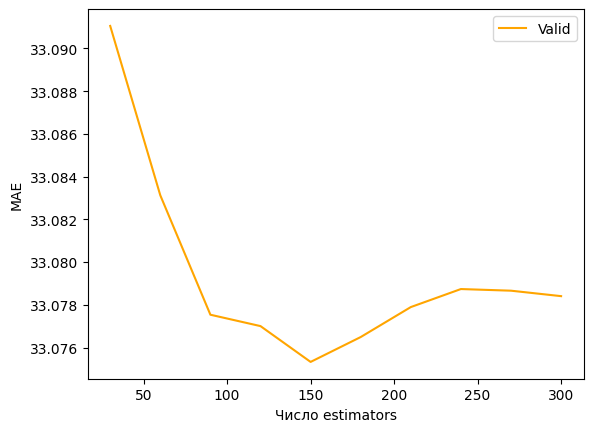

In [72]:
estim_scoring = np.array(estim_scoring)
# plt.plot(estimators_cv, estim_scoring[:, 0], color="blue", label='Train')
plt.plot(estimators_cv, estim_scoring[:, 1], color="orange", label='Valid')
plt.legend()
plt.xlabel('Число estimators')
plt.ylabel('MAE')
plt.show()

In [75]:
optim_n_estim_bag = estimators_cv[np.argmin(estim_scoring[:, 1])]
optim_n_estim_bag

150

In [78]:
depth_scoring = []

for depth in max_depth_cv:
    print(f"max_depth: {depth}")
    tree = DecisionTreeRegressor(max_depth=depth)
    bag_of_trees = BaggingRegressor(tree, n_estimators=optim_n_estim_bag, random_state=42)
    bag_of_trees.fit(x_train[real_cols], y_train)
    bag_mse_val = mean_absolute_error(bag_of_trees.predict(x_val[real_cols]), y_val)
    bag_mse_train = mean_absolute_error(bag_of_trees.predict(x_train[real_cols]), y_train)
    depth_scoring.append([bag_mse_train, bag_mse_val])

max_depth: 5


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


max_depth: 10


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


max_depth: 15


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


max_depth: 20


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


max_depth: 25


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


max_depth: 30


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


max_depth: 35


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


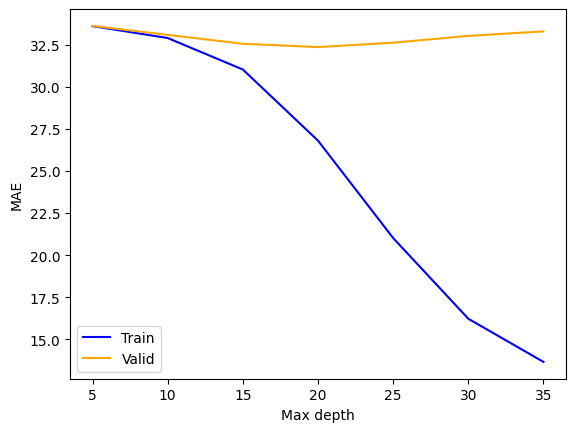

In [89]:
depth_scoring = np.array(depth_scoring)
plt.plot(max_depth_cv, depth_scoring[:, 0], color="blue", label='Train')
plt.plot(max_depth_cv, depth_scoring[:, 1], color="orange", label='Valid')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('MAE')
plt.show()

In [88]:
optim_depth = max_depth_cv[np.argmin(depth_scoring[:, 1])]
optim_depth

20

## 2.3 Random Forest

In [81]:
# Задача: обучить, выявить оптимальное количество моделей в регрессоре, оптимальные параметры для регрессора
forest = RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=42, criterion='squared_error', max_depth=9)
forest.fit(x_train[real_cols], y_train)
rf_mse_val = mean_absolute_error(forest.predict(x_val[real_cols]), y_val)
rf_mse_val

/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


33.21772406454778

In [82]:
estimators_cv = [50 * (i + 1) for i in range(10)]

rf_scoring = []

for n_estim in estimators_cv:
    print(f"N estimators: {n_estim}")
    forest = RandomForestRegressor(n_estimators=n_estim, n_jobs=-1, random_state=42, criterion='squared_error', max_depth=optim_depth)
    forest.fit(x_train[real_cols], y_train)
    forest_mse_val = mean_absolute_error(forest.predict(x_val[real_cols]), y_val)
    forest_mse_train = mean_absolute_error(forest.predict(x_train[real_cols]), y_train)
    rf_scoring.append([forest_mse_train, forest_mse_val])

rf_scoring

N estimators: 50


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 100


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 150


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 200


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 250


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 300


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 350


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 400


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 450


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 500


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[21.11731628989619, 32.76665375710338],
 [21.02643729138951, 32.66889278117728],
 [21.01183084115992, 32.61908088747554],
 [21.008071479640954, 32.60925131860672],
 [21.00192295970225, 32.60372252363426],
 [20.98061662992583, 32.59607650215119],
 [20.9742276365697, 32.5961212096196],
 [20.97201572312523, 32.58605341672538],
 [20.962389934683994, 32.58385563919566],
 [20.95773756623914, 32.58213278165053]]

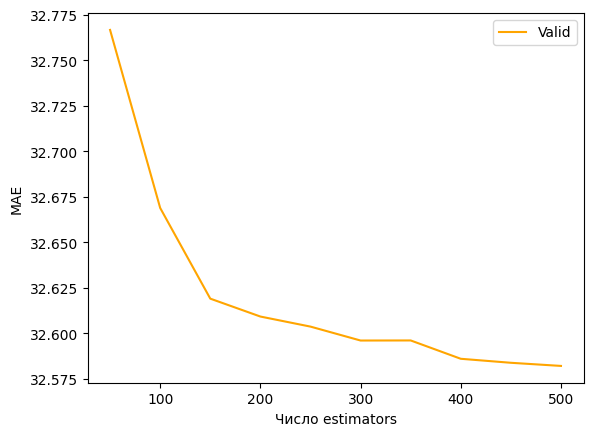

In [90]:
rf_scoring = np.array(rf_scoring)
# plt.plot(estimators_cv, rf_scoring[:, 0], color="blue", label='Train')
plt.plot(estimators_cv, rf_scoring[:, 1], color="orange", label='Valid')
plt.legend()
plt.xlabel('Число estimators')
plt.ylabel('MAE')
plt.show()

In [92]:
optim_n_estim_tree = estimators_cv[np.argmin(rf_scoring[:, 1])]
optim_n_estim_tree

500

# 3. Работа с категориальными переменными

## 3.1.One hot encoding

Представим, что у нас есть признак, который принимает n значений, One hot encoding создает n признаков вместо изначального, при этом каждый новый признак принимает значения $\{0,1\}$, при этом все признаки каждого объекта будут равны 0, и только один 1

Возможно использовать `OneHotEncoder` из sklearn.preprocessing, но мы будем испольовать `pandas`

In [93]:
print(train['UniqueCarrier'].unique())
print(train['UniqueCarrier'].nunique())

['US' 'NW' 'WN' 'OH' 'AA' 'EV' 'B6' 'MQ' 'YV' 'DL' 'UA' 'AS' 'XE' 'OO'
 'FL' 'CO' 'F9' 'HA' '9E' 'AQ']
20


In [94]:
train = pd.get_dummies(train, drop_first=True, columns=['UniqueCarrier'])
#test = pd.get_dummies(test, drop_first=True, columns=['UniqueCarrier'])

In [95]:
train.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,4,23,3,700,907,1195,N119US,307.0,PHL,PHX,...,False,False,False,False,False,False,True,False,False,False
1,7,18,5,2154,2349,401,N637AW,115.0,PHX,SFO,...,False,False,False,False,False,False,True,False,False,False
2,12,21,7,1921,1949,1767,N782NC,88.0,DTW,MSN,...,False,False,True,False,False,False,False,False,False,False
3,4,24,4,1955,2020,1865,N272WN,145.0,SAT,PHX,...,False,False,False,False,False,False,False,True,False,False
4,6,27,5,1700,1848,5186,N804CA,108.0,ORF,CVG,...,False,False,False,True,False,False,False,False,False,False


## 3.2 Кодирование переменных

In [96]:
#Создадим новую фичу 'route', которая будет содержать информацию как о точке отправления, так и о месте назначения
train['route'] = train['Origin'] + train['Dest']
# test['route'] = test['Origin'] + test['Dest']
train['route'].nunique() #, test['route'].nunique()

5130

Давайте закодируем каждое значение 'route' средним значением целевой переменной для этого значения

In [108]:
code_route = pd.pivot_table(pd.concat([pd.DataFrame(train), y],axis=1), 
                            index='route', values='DelayTime', aggfunc='mean')

In [109]:
train['route'] = train['route'].apply(lambda x: code_route.loc[x][0] if x in code_route.index else 0)
# test['route'] = test['route'].apply(lambda x: code_route.loc[x][0] if x in code_route.index else 0)

/tmp/ipykernel_23933/2059150329.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train['route'] = train['route'].apply(lambda x: code_route.loc[x][0] if x in code_route.index else 0)


In [110]:
types = train.dtypes
real_cols = list(types[types != 'object'].index.values)

In [111]:
x_train, x_val, y_train, y_val = train_test_split(train, y, train_size=0.8, test_size=0.2, random_state=1)

In [112]:
# Обучить и выявить оптимальные параметры BaggingRegressor, RandomForestRegressor для расширенного набора данных
# Bagging
estimators_cv = [30 * (i + 1) for i in range(10)]

estim_scoring = []

for n_estim in estimators_cv:
    print(f"n_estim: {n_estim}")
    tree = DecisionTreeRegressor(max_depth=optim_depth)
    bag_of_trees = BaggingRegressor(tree, n_estimators=n_estim, random_state=42)
    bag_of_trees.fit(x_train[real_cols], y_train)
    bag_mse_val = mean_absolute_error(bag_of_trees.predict(x_val[real_cols]), y_val)
    bag_mse_train = mean_absolute_error(bag_of_trees.predict(x_train[real_cols]), y_train)
    estim_scoring.append([bag_mse_train, bag_mse_val])

n_estim: 30


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 60


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 90


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 120


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 150


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 180


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 210


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 240


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 270


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


n_estim: 300


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


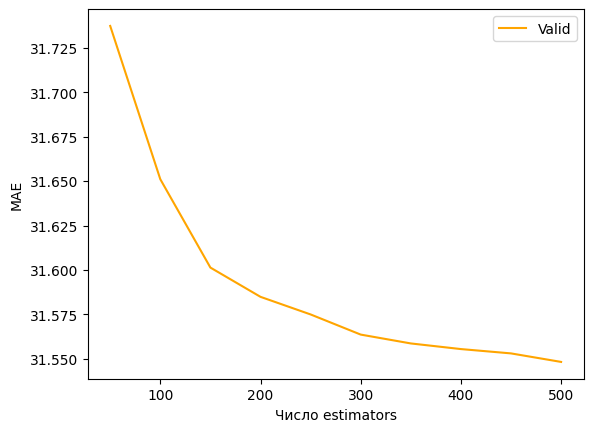

In [116]:
estim_scoring = np.array(estim_scoring)
# plt.plot(estimators_cv, estim_scoring[:, 0], color="blue", label='Train')
plt.plot(estimators_cv, estim_scoring[:, 1], color="orange", label='Valid')
plt.legend()
plt.xlabel('Число estimators')
plt.ylabel('MAE')
plt.show()

In [114]:
# Random Forest
estimators_cv = [50 * (i + 1) for i in range(10)]

rf_scoring = []

for n_estim in estimators_cv:
    print(f"N estimators: {n_estim}")
    forest = RandomForestRegressor(n_estimators=n_estim, n_jobs=-1, random_state=42, criterion='squared_error', max_depth=optim_depth)
    forest.fit(x_train[real_cols], y_train)
    forest_mse_val = mean_absolute_error(forest.predict(x_val[real_cols]), y_val)
    forest_mse_train = mean_absolute_error(forest.predict(x_train[real_cols]), y_train)
    rf_scoring.append([forest_mse_train, forest_mse_val])

rf_scoring

N estimators: 50


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 100


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 150


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 200


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 250


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 300


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 350


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 400


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 450


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


N estimators: 500


/home/loopa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[25.136122035140378, 31.672280366224353],
 [25.09794856857869, 31.590088286753986],
 [25.087975462351615, 31.575009798353598],
 [25.08902554412173, 31.56055858871237],
 [25.087196930975296, 31.553090702037725],
 [25.07931576274629, 31.547519075751907],
 [25.074674346226246, 31.546045868593126],
 [25.077027498069626, 31.54568114077981],
 [25.0756082915228, 31.543675451568706],
 [25.07410881830476, 31.542771136619994]]

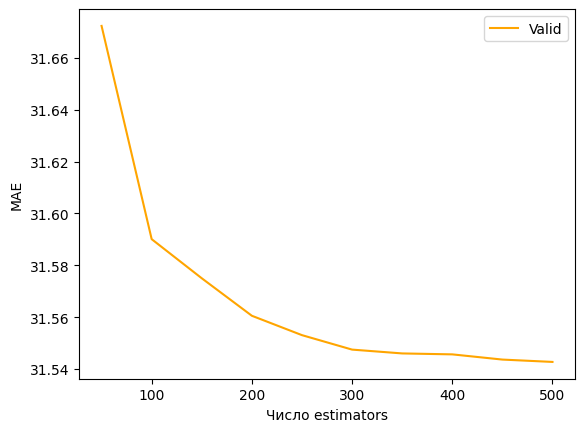

In [117]:
rf_scoring = np.array(rf_scoring)
# plt.plot(estimators_cv, rf_scoring[:, 0], color="blue", label='Train')
plt.plot(estimators_cv, rf_scoring[:, 1], color="orange", label='Valid')
plt.legend()
plt.xlabel('Число estimators')
plt.ylabel('MAE')
plt.show()

# 4  Самостоятельное написание дерева решений

Источник: [mlcourse.ai](https://mlcourse.ai) от [Юрия Кашницкого](https://yorko.github.io) и [OpenDataScience](https://ods.ai)

In [119]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, нужно построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. 

Text(0, 0.5, '$y$')

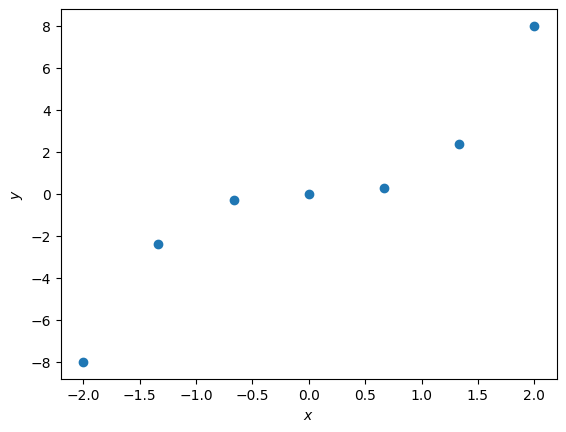

In [120]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку.

Text(0, 0.5, '$y$')

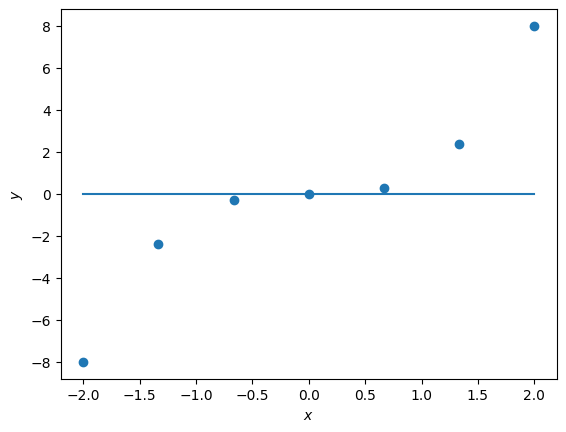

In [121]:
plt.scatter(X, y)
plt.plot(np.linspace(-2, 2, 50), np.mean(y)*np.ones(50))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

Text(0, 0.5, '$y$')

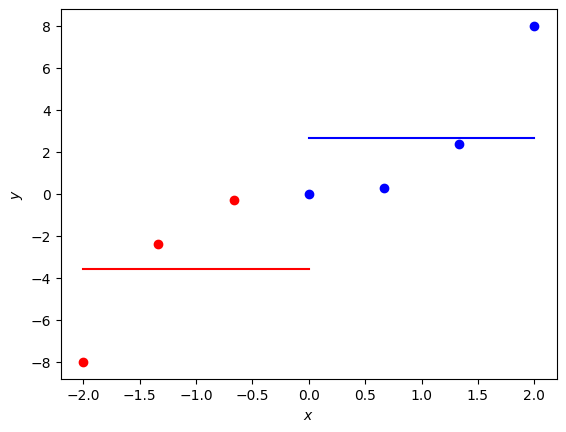

In [122]:
negative_0_X_indexes = np.asarray(X < 0).nonzero()
positive_0_X_indexes = np.asarray(X >= 0).nonzero()

X_neg, X_pos, y_neg, y_pos = X[negative_0_X_indexes], X[positive_0_X_indexes], y[negative_0_X_indexes], y[positive_0_X_indexes]

plt.scatter(X_neg, y_neg, color='red')
plt.scatter(X_pos, y_pos, color='blue')
plt.plot(np.linspace(-2, 0, 50), np.mean(y_neg)*np.ones(50), color='red')
plt.plot(np.linspace(0, 2, 50), np.mean(y_pos)*np.ones(50), color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий: $$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$ где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[xj < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$: $$D(X) = \dfrac{1}{|X|} \sum{x_j \in X}(y_j – \dfrac{1}{|X|}\sum{x_i \in X}y_i)^2,$$ где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине).

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [57]:
def D(y):
  y_mean = np.mean(y)
  return sum((y-y_mean)**2)/len(y)

In [58]:
def Q(X, y, t):
  return D(y) - len(y[X < t])/len(y)*D(y[X < t]) - len(y[X >= t])/len(y)*D(y[X >= t])

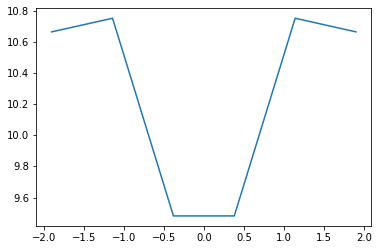

In [59]:
t = np.linspace(-1.9, 1.9, len(X)-1)
q = np.zeros((len(X)-1))

for i in range(len(X)-1):
  q[i] = Q(X, y, t[i])
plt.plot(t, q)

In [60]:
T = t[np.argmin(q)]
T

0.38000000000000034

Text(0, 0.5, '$y$')

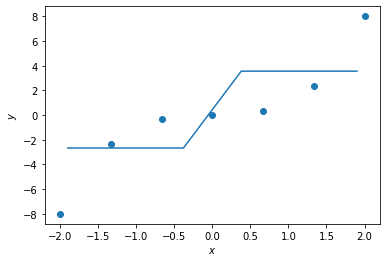

In [61]:
plt.scatter(X, y)

y_pred = np.mean(y[X < T])*(t < T) + np.mean(y[X >= T])*(t >= T)
plt.plot(t, y_pred)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')